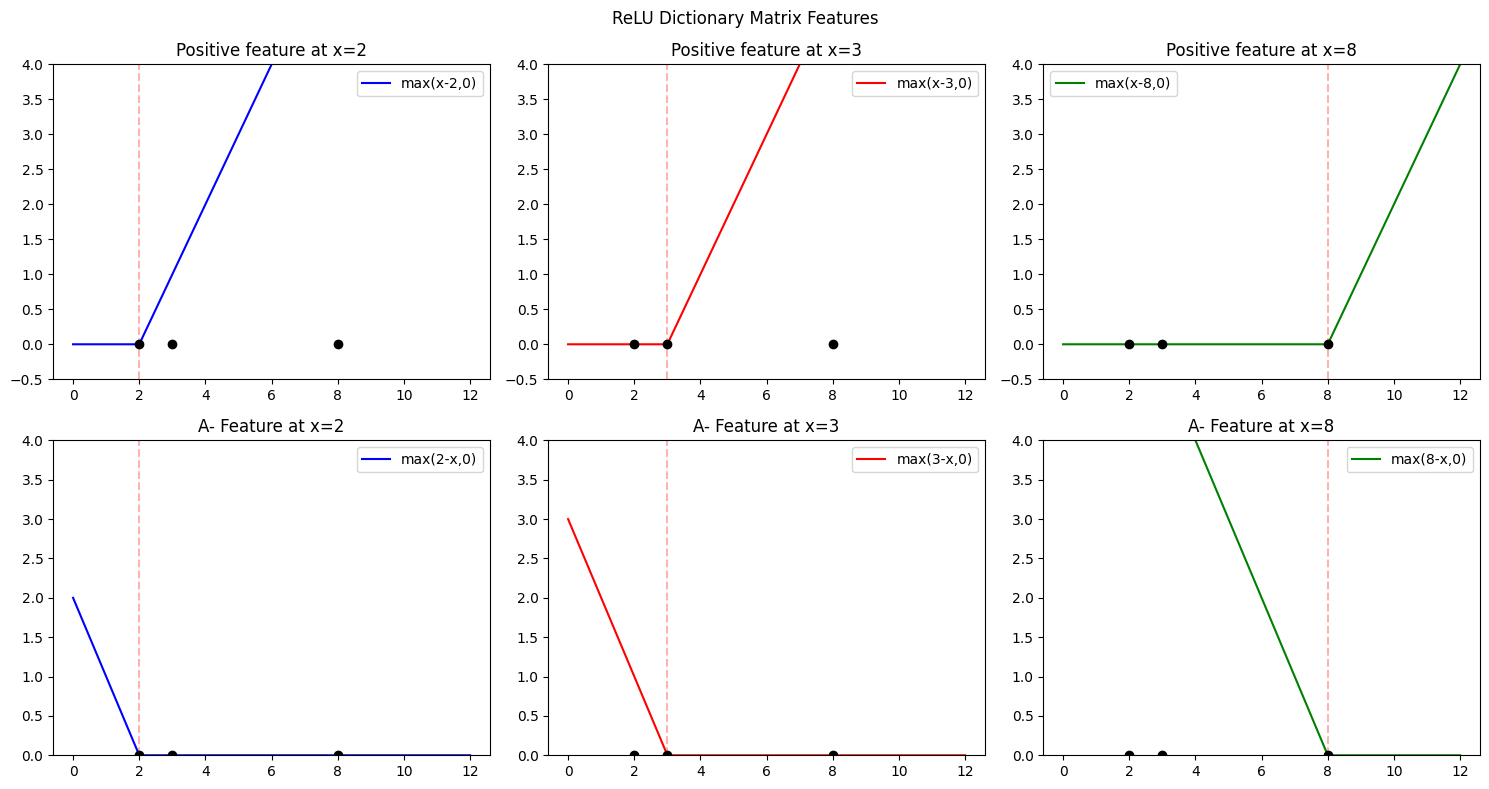

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create data points
x = np.linspace(0, 12, 1000)  # Extend x range to accommodate the third plot
data_points = [2, 3, 8]

# Define colors for each graph
colors = ['b', 'r', 'g']  # Blue, Red, Green

# Create figure with 2 rows (A+ and A-) and 3 columns (one for each data point)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('ReLU Dictionary Matrix Features')

# Plot A+ features (upward ramps)
for i, dp in enumerate(data_points):
    if i == 2:
        x_local = np.linspace(0, 12, 1000)
    else:
        x_local = x

    y = np.maximum(x_local - dp, 0)
    axes[0, i].plot(x_local, y, colors[i] + '-', label=f'max(x-{dp},0)')
    axes[0, i].axvline(x=dp, color='r', linestyle='--', alpha=0.3)
    axes[0, i].set_title(f'Positive feature at x={dp}')
    axes[0, i].set_ylim(-0.5, 4)
    axes[0, i].grid(False)
    axes[0, i].legend()
    # Plot data points
    axes[0, i].plot(data_points, [0]*len(data_points), 'ko')

# Plot A- features (downward ramps)
for i, dp in enumerate(data_points):
    y = np.maximum(dp - x, 0)
    axes[1, i].plot(x, y, colors[i] + '-', label=f'max({dp}-x,0)')
    axes[1, i].axvline(x=dp, color='r', linestyle='--', alpha=0.3)
    axes[1, i].set_title(f'A- Feature at x={dp}')
    axes[1, i].set_ylim(0, 4)
    axes[1, i].grid(False)
    axes[1, i].legend()
    # Plot data points
    axes[1, i].plot(data_points, [0]*len(data_points), 'ko')

# Adjust layout and display
plt.tight_layout()
plt.show()




### Stock Plots for breakpoints and reflections

#### Only data points as break points

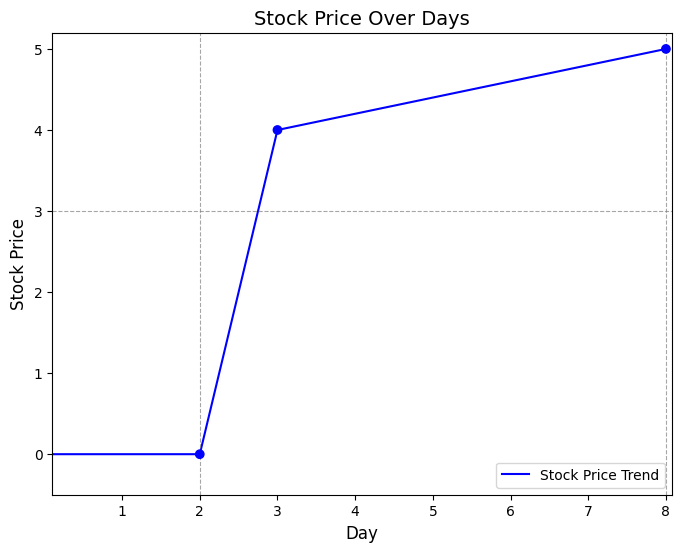

In [33]:
import matplotlib.pyplot as plt

x_values = [0, 2, 3, 8]
y_values = [0, 0, 4, 5]

colors = ['blue', 'blue', 'blue', 'blue']

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'b-', label='Stock Price Trend')
plt.scatter(x_values, y_values, color=colors, zorder=5)

plt.xlabel('Day', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)

plt.axhline(y=3, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axhline(y=7, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(x=2, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(x=8, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

plt.xlim(0.1, 8.08)
plt.ylim(-0.5, 5.2)

plt.title('Stock Price Over Days', fontsize=14)
plt.legend()

plt.show()



#### Including normal reflections

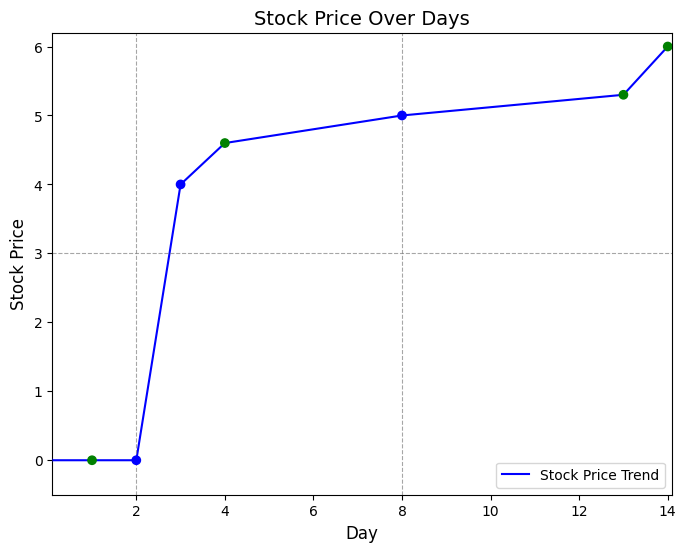

In [39]:
import matplotlib.pyplot as plt

x_values = [0, 1, 2, 3, 4, 8, 13, 14]
y_values = [0, 0, 0, 4, 4.6, 5, 5.3, 6]

colors = ['blue', 'green', 'blue', 'blue', 'green', 'blue', 'green', 'green']

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'b-', label='Stock Price Trend')
plt.scatter(x_values, y_values, color=colors, zorder=5)

plt.xlabel('Day', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)

plt.axhline(y=3, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axhline(y=7, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(x=2, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(x=8, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

plt.xlim(0.1, 14.1)
plt.ylim(-0.5, 6.2)

plt.title('Stock Price Over Days', fontsize=14)
plt.legend()

plt.show()

#### Including double reflections

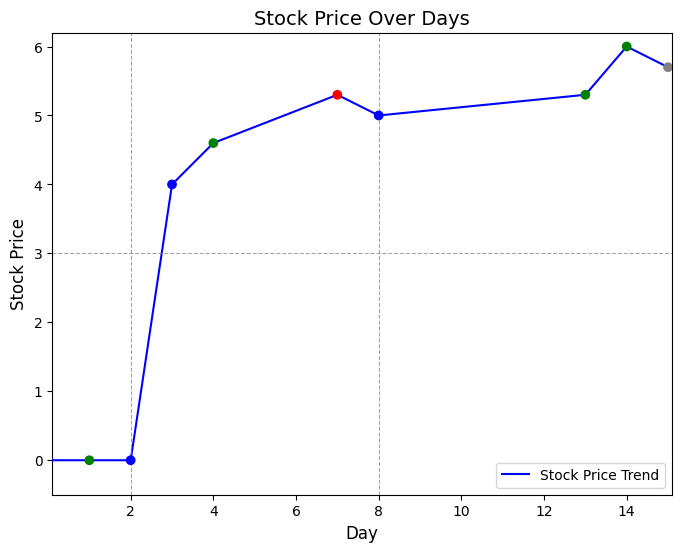

In [42]:
import matplotlib.pyplot as plt

x_values = [0, 1, 2, 3, 4, 7, 8, 13, 14, 15]
y_values = [0, 0, 0, 4, 4.6, 5.3, 5, 5.3, 6, 5.7]

colors = ['blue', 'green', 'blue', 'blue', 'green', 'red','blue', 'green', 'green', 'grey']
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, 'b-', label='Stock Price Trend')
plt.scatter(x_values, y_values, color=colors, zorder=5)

plt.xlabel('Day', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)

plt.axhline(y=3, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axhline(y=7, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(x=2, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axvline(x=8, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

plt.xlim(0.1, 15.1)
plt.ylim(-0.5, 6.2)

plt.title('Stock Price Over Days', fontsize=14)
plt.legend()

plt.show()

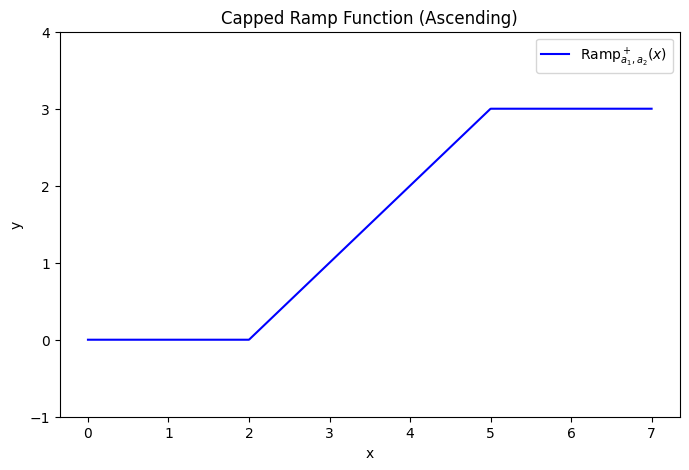

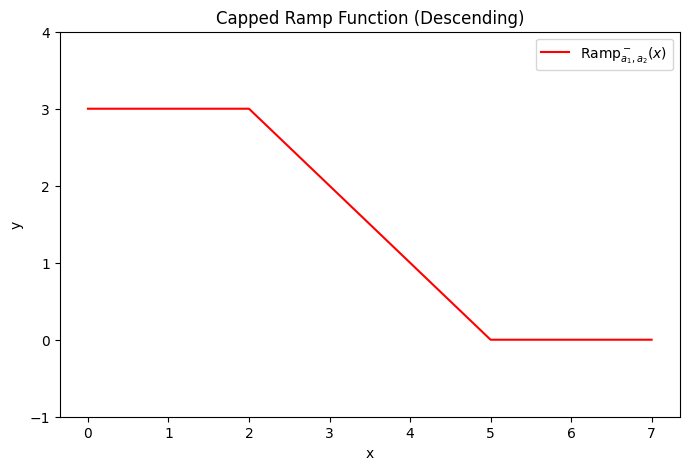

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Definition der aufsteigenden capped ramp function
def capped_ramp_plus(x, a1, a2):
    return np.piecewise(x,
                        [x <= a1, (x > a1) & (x <= a2), x > a2],
                        [0, lambda x: x - a1, a2 - a1])

# Definition der absteigenden capped ramp function
def capped_ramp_minus(x, a1, a2):
    return np.piecewise(x,
                        [x <= a1, (x > a1) & (x <= a2), x > a2],
                        [a2 - a1, lambda x: a2 - x, 0])

# Wertebereich für x
x = np.linspace(0, 7, 1000)

# Breakpoints
a1, a2 = 2, 5

# Werte für die Funktionen berechnen
y_plus = capped_ramp_plus(x, a1, a2)
y_minus = capped_ramp_minus(x, a1, a2)

# Plot 1: Aufsteigende capped ramp function
plt.figure(figsize=(8, 5))
plt.plot(x, y_plus, label=r'$\text{Ramp}^+_{a_1,a_2}(x)$', color='blue')
plt.title('Capped Ramp Function (Ascending)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 4)  # Grenzt den Plot auf eine sinnvolle Höhe ein
plt.legend()
plt.show()

# Plot 2: Absteigende capped ramp function
plt.figure(figsize=(8, 5))
plt.plot(x, y_minus, label=r'$\text{Ramp}^-_{a_1,a_2}(x)$', color='red')
plt.title('Capped Ramp Function (Descending)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 4)  # Grenzt den Plot auf eine sinnvolle Höhe ein
plt.legend()
plt.grid(False)
plt.show()



Epoch 0, Loss: 0.49034324288368225
Epoch 100, Loss: 0.37938565015792847
Epoch 200, Loss: 0.06458817422389984
Epoch 300, Loss: 0.019014669582247734
Epoch 400, Loss: 0.013421772047877312
Epoch 500, Loss: 0.013311916030943394
Epoch 600, Loss: 0.013692899607121944
Epoch 700, Loss: 0.014263518154621124
Epoch 800, Loss: 0.012672020122408867
Epoch 900, Loss: 0.012595279142260551
Epoch 1000, Loss: 0.014764840714633465
Epoch 1100, Loss: 0.012464992702007294
Epoch 1200, Loss: 0.01314147561788559
Epoch 1300, Loss: 0.013355021364986897
Epoch 1400, Loss: 0.012984134256839752
Epoch 1500, Loss: 0.01232356671243906
Epoch 1600, Loss: 0.012785110622644424
Epoch 1700, Loss: 0.013698461465537548
Epoch 1800, Loss: 0.011983934789896011
Epoch 1900, Loss: 0.012427927926182747
Epoch 2000, Loss: 0.013042780570685863
Epoch 2100, Loss: 0.012699795886874199
Epoch 2200, Loss: 0.012242753989994526
Epoch 2300, Loss: 0.012314091436564922
Epoch 2400, Loss: 0.012206354178488255
Epoch 2500, Loss: 0.016854088753461838
Epo

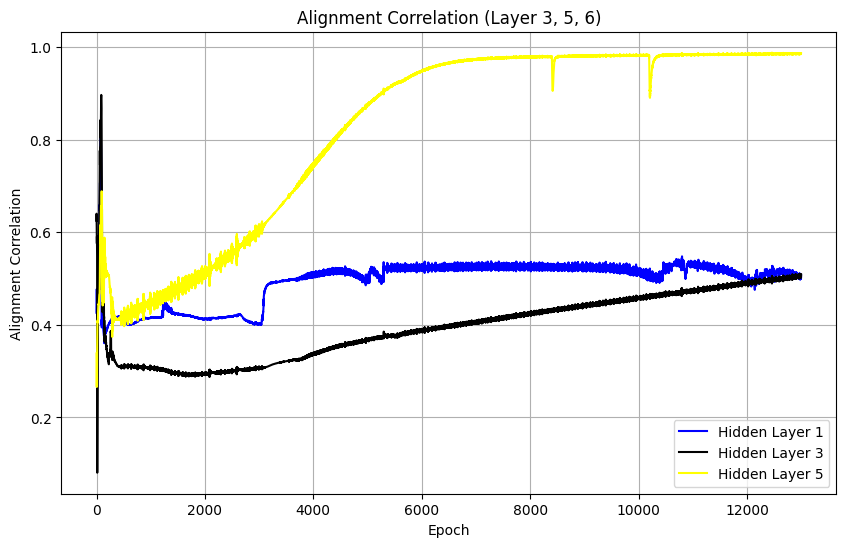

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Funktion zur Berechnung der Alignment-Korrelation
def compute_alignment(H, G):
    # Normalisiere die Aktivierungen und Gradienten
    H = H / torch.norm(H, dim=1, keepdim=True)
    G = G / torch.norm(G, dim=1, keepdim=True)

    # Berechne Kovarianzmatrizen
    H_cov = torch.mm(H.t(), H) / H.size(0)  # E[hh^T]
    G_cov = torch.mm(G.t(), G) / G.size(0)  # E[gg^T]

    # Berechne Alignment nach Liu Paper
    numerator = torch.sum(H_cov * G_cov)
    denominator = torch.sqrt(torch.sum(H_cov * H_cov) * torch.sum(G_cov * G_cov))

    return (numerator / (denominator + 1e-8)).item()


# Netzwerk mit 6 versteckten Schichten
class SimpleNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(negative_slope=0.01),  # Verwende Leaky ReLU
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(negative_slope=0.01),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(negative_slope=0.01),  # Neues 6. Layer hinzugefügt
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        activations = []
        x_current = x
        for layer in self.layers:
            x_current = layer(x_current)
            if isinstance(layer, nn.Linear):
                x_current.retain_grad()  # Wichtig für Gradientenberechnung
                activations.append(x_current)
        return x_current, activations


# Trainingsparameter
input_dim = 1
hidden_dim = 4
output_dim = 1
epochs = 13000
batch_size = 128
learning_rate = 0.01
gamma = 1e-5  # Sehr kleines Gamma (Regularisierungsstärke)

# Synthetischer Datensatz mit klarer Struktur: Sinuswelle mit Rauschen
torch.manual_seed(42)
N = 1000
X = torch.linspace(-10, 10, N).unsqueeze(1)  # Gleichmäßige Verteilung
y = torch.sin(X) + 0.1 * torch.randn_like(X)  # Sinusfunktion mit Rauschen

# Modell, Loss und Optimizer
model = SimpleNet(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=gamma)  # Kleinere Regularisierung

# Speichern der Alignment-Korrelationen
correlations = {layer: [] for layer in range(6)}  # 6 versteckte Schichten

# Training
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs, activations = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    # Debugging: Überprüfen, ob Gradienten und Aktivierungen sinnvoll sind
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

    # Berechnung der Alignments für jede Schicht
    for i, activation in enumerate(activations):
        if activation.grad is not None:  # Sicherstellen, dass Gradienten existieren
            H = activation
            G = -activation.grad
            correlation = compute_alignment(H, G)
            correlations[i].append(correlation)

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
for layer, corr_values in correlations.items():
    if layer == 0:
        plt.plot(range(len(corr_values)), corr_values, label=f'Hidden Layer {layer + 1}', color='blue')
    elif layer == 2:
        plt.plot(range(len(corr_values)), corr_values, label=f'Hidden Layer {layer + 1}', color='black')
    elif layer == 4:
        plt.plot(range(len(corr_values)), corr_values, label=f'Hidden Layer {layer + 1}', color='yellow')
plt.xlabel('Epoch')
plt.ylabel('Alignment Correlation')
plt.title('Alignment Correlation (Layer 3, 5, 6)')
plt.legend()
plt.grid(True)
plt.show()

